<a href="https://colab.research.google.com/github/MemonML/datascience_bootcamp/blob/main/PCA_and_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA and LDA

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# features scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# PCA and LDA models definition
pca = PCA(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
# Transform training and testing data using PCA
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Transform training and testing data using LDA
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [ ]:
# Train a SVM classifier on PCA-transformed data
svm_pca = SVC(kernel='linear')
svm_pca.fit(X_train_pca, y_train)

# Train a SVM classifier on LDA-transformed data
svm_lda = SVC(kernel='linear')
svm_lda.fit(X_train_lda, y_train);



In [ ]:
# predictions on the test set for PCA and LDA models
y_pred_pca = svm_pca.predict(X_test_pca)
y_pred_lda = svm_lda.predict(X_test_lda)

# accuracy for PCA and LDA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print("Accuracy PCA:", accuracy_pca)
print("Accuracy LDA:", accuracy_lda)

Accuracy PCA: 0.9555555555555556
Accuracy LDA: 1.0


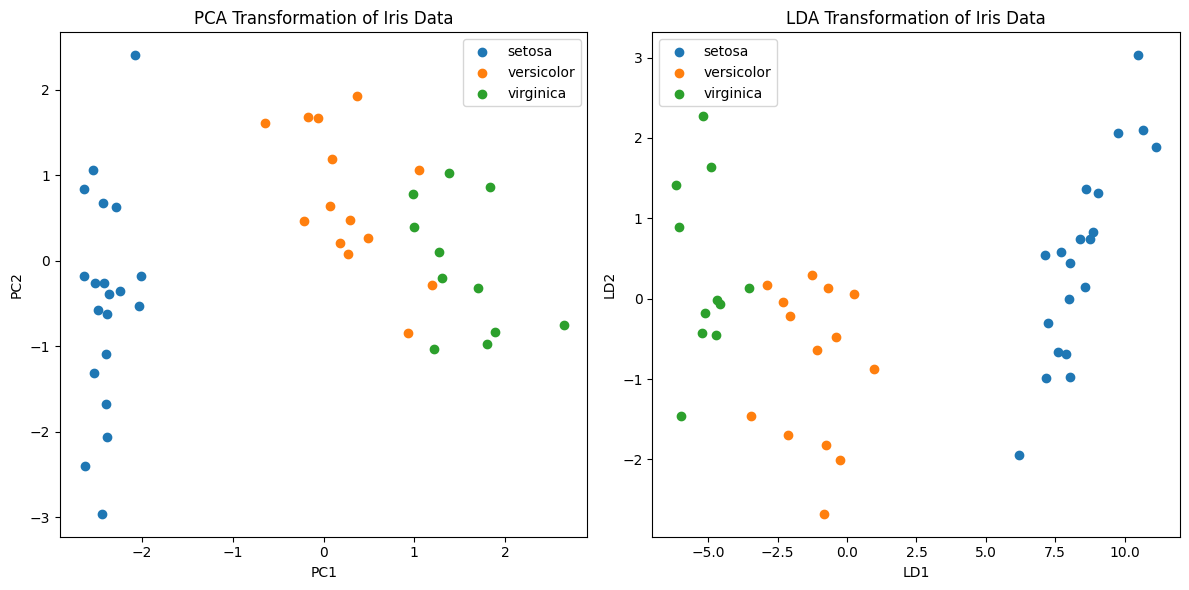

In [ ]:
# PCA and LDA Visualization

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=target_name)
plt.title('PCA Transformation of Iris Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.subplot(1, 2, 2)
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_test_lda[y_test == i, 0], X_test_lda[y_test == i, 1], label=target_name)
plt.title('LDA Transformation of Iris Data')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("Accuracy (PCA):", accuracy_pca)
print("Accuracy (LDA):", accuracy_lda)

Accuracy (PCA): 0.9555555555555556
Accuracy (LDA): 1.0
